# Parabilic SAR AF パラメータのスクリーニング・チェック (2)

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)

In [3]:
date_target = '2025-03-31'
path_base = '../doe/results_Simple_SAR_2'

## データソース

In [4]:
ods_name = os.path.join(path_base, 'summary_%s.ods' % date_target)
ods_name
df = pd.read_excel(ods_name)
df

,#,af_init,af_step,af_max,7011,7203,8306
0,1,0,0.00001,0.00010,-6650,-3150,-2500
1,2,0,0.00002,0.00020,-4450,-2350,-2100
2,3,0,0.00003,0.00030,-3050,-1350,-400
3,4,0,0.00005,0.00050,-4250,-3350,-1400
4,5,0,0.00007,0.00075,-2650,-3250,-400
5,6,0,0.00010,0.00100,-3750,-6850,-100
6,7,0,0.00020,0.00200,-1850,-2150,-1200
7,8,0,0.00030,0.00300,5250,550,-1500
8,9,0,0.00050,0.00500,2450,850,1700
9,10,0,0.00075,0.00750,1650,1950,7000


## AF step vs. Profit

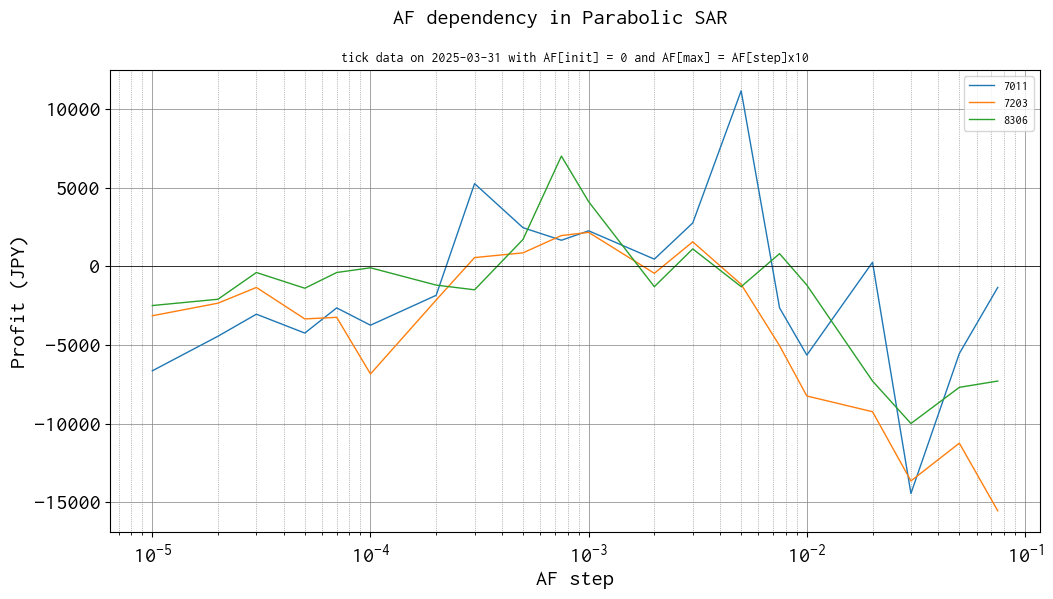

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

for code in [7011, 7203, 8306]:
    x = df['af_step']
    y = df[code]
    ax.plot(x, y, label='%d' % code, lw=1)

ax.axhline(0, color='black', lw=0.5)
ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title('tick data on %s with AF[init] = 0 and AF[max] = AF[step]x10' % date_target, fontsize=10)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=16)
plt.savefig('./study_202_AF/%s.png' % date_target)
plt.show()